In [51]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.folder_handler import *
from src.cort_processor import *
from src.cca_processor import *
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
import pickle
import scipy as spicy
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from src.wiener_filter import *
from matplotlib.pyplot import cm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import scipy.io as sio

In [53]:
n5_1 = CortProcessor('/home/diya/Documents/MATLAB/Intracortical/N5_170929_No Obstacles_s.mat')

this is filipe data i belive


In [54]:
n5_2 = CortProcessor('/home/diya/Documents/MATLAB/Intracortical/N5_171130_No Obstacles_s.mat')

this is filipe data i belive


In [55]:
sess = CCAProcessor(n5_1, n5_2)

should be good to align


In [64]:
x1, y1, x2, y2 = sess.process_and_align_kinematics()

# x2 data on x1 decoder

In [67]:
from sklearn.decomposition import PCA
pca_x2 = PCA(n_components=13)
x2_pca = pca_x2.fit_transform(x2)

In [69]:
format_x1, format_y1 = format_data(x1, y1)
format_x2, format_y2 = format_data(x2_pca, y2)

In [85]:
y1_hat = test_wiener_filter(format_x1, sess.cp1.h)
vaf(format_y1[:,1], y1_hat[:,1])

0.5551665092208801

In [86]:
y2_hat = test_wiener_filter(format_x2, sess.cp1.h)
vaf(format_y2[:,1], y2_hat[:,1])

-7.940550855197241

# x2 cca data on x1 decoder

In [87]:
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler

In [89]:
cca_x1x2 = CCA(n_components=13, scale=False)
x1_cca, x2_cca=cca_x1x2.fit_transform(x1, x2)

In [90]:
x2_hat = cca_x1x2.inverse_transform(x2_cca) 

In [114]:
x1_hat = cca_x1x2.inverse_transform(x1_cca) 

In [92]:
format_x1, format_y1 = format_data(x1, y1)
format_x2_cca, format_y2 = format_data(x2_hat, y2)

In [115]:
format_x1_cca, format_y1 = format_data(x1_hat, y1)

In [120]:
y2_hat_cca = test_wiener_filter(format_x2_cca, sess.cp1.h)
vaf(format_y2[:,1], y2_hat_cca[:,1])

-1.4655283093053582

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
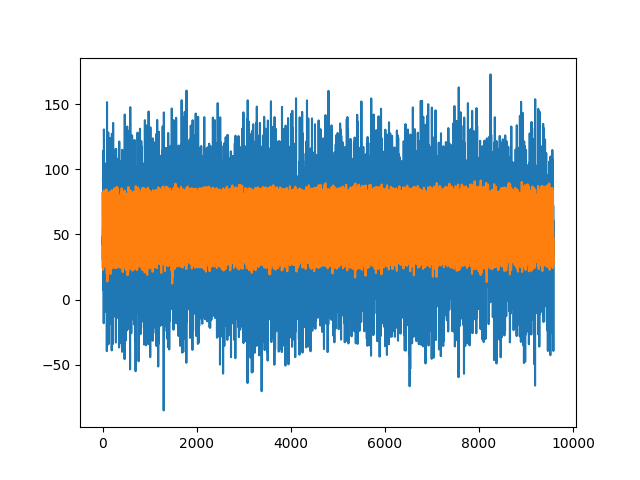

In [121]:
fig, ax = plt.subplots()
ax.plot(y2_hat_cca[:,1])
ax.plot(format_y2[:,1])